In [1]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [3]:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
train_losses = []
val_losses = []

In [6]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            train_losses.append(running_loss)
            running_loss = 0.0
            
    val_running_loss = 0.0
    for i, data in enumerate(testloader,0):
        inputs, labels = data
        outputs = net(inputs)
        val_loss = criterion(outputs, labels)
        val_running_loss += val_loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] val_loss: {val_running_loss / 2000:.3f}')
            val_losses.append(val_running_loss)
            val_running_loss = 0.0
        

print('Finished Training')

[1,  2000] loss: 2.177
[1,  4000] loss: 1.834
[1,  6000] loss: 1.657
[1,  8000] loss: 1.567
[1, 10000] loss: 1.542
[1, 12000] loss: 1.498
[1,  2000] val_loss: 1.421
[2,  2000] loss: 1.431
[2,  4000] loss: 1.419
[2,  6000] loss: 1.368
[2,  8000] loss: 1.347
[2, 10000] loss: 1.324
[2, 12000] loss: 1.297
[2,  2000] val_loss: 1.277
[3,  2000] loss: 1.252
[3,  4000] loss: 1.237
[3,  6000] loss: 1.232
[3,  8000] loss: 1.199
[3, 10000] loss: 1.212
[3, 12000] loss: 1.192
[3,  2000] val_loss: 1.220
[4,  2000] loss: 1.129
[4,  4000] loss: 1.123
[4,  6000] loss: 1.120
[4,  8000] loss: 1.118
[4, 10000] loss: 1.113
[4, 12000] loss: 1.121
[4,  2000] val_loss: 1.121
[5,  2000] loss: 1.028
[5,  4000] loss: 1.063
[5,  6000] loss: 1.050
[5,  8000] loss: 1.074
[5, 10000] loss: 1.040
[5, 12000] loss: 1.069
[5,  2000] val_loss: 1.136
[6,  2000] loss: 0.964
[6,  4000] loss: 0.979
[6,  6000] loss: 1.011
[6,  8000] loss: 1.001
[6, 10000] loss: 1.004
[6, 12000] loss: 1.031
[6,  2000] val_loss: 1.125
[7,  2000]

In [9]:
val_losses = [l/2000.0 for l in val_losses]
print(val_losses[0])

1.4210288652926684


In [15]:
print(len(val_losses))
val_x = list(range(len(val_losses)))
val_x = [x*6 for x in val_x]

15


In [16]:
train_losses = [l/2000.0 for l in train_losses]
train_x = list(range(len(train_losses)))

In [21]:
print(train_x[0])

0


In [17]:
print(val_x)
print(train_x)

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


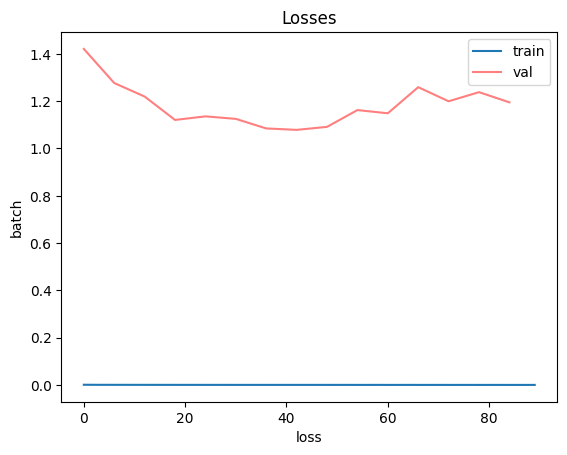

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.plot(train_x, train_losses, label='train')
plt.plot(val_x, val_losses, color='r', alpha=0.5, label='val')
plt.legend()

ax.set_ylabel('batch')
ax.set_xlabel('loss')
ax.set_title(f'Losses')

plt.show()

In [32]:
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

correct = 0
total = 0
x_confs = []
y_label = []
y_predicted = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # print(outputs.data.shape)
        # the class with the highest energy is what we choose as prediction
        soft_max = F.softmax(outputs.data, 1)
        conf, predicted = torch.max(soft_max.data, 1)
        #print(predicted)
        y_label.append(labels.detach().numpy())
        y_predicted.append(predicted.detach().numpy())
        x_confs.append(conf.detach().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


In [37]:
x_confs = np.stack(x_confs)
print(x_confs.shape)
y_label = np.stack(y_label)
print(y_label.shape)
y_predicted = np.stack(y_predicted)
print(y_predicted.shape)

x_confs = torch.from_numpy(x_confs)
y_label = torch.from_numpy(y_label)
y_predicted = torch.from_numpy(y_predicted)

(10000, 1)
(10000, 1)
(10000, 1)


In [41]:
accs = y_predicted == y_label
print(accs[0])
print(torch.sum(accs))

tensor([True])
tensor(6241)


In [38]:
n_bins = 10
bin_boundaries = torch.linspace(0, 1, n_bins + 1)
bin_lowers = bin_boundaries[:-1]
bin_uppers = bin_boundaries[1:]

In [45]:
bin_label = (bin_lowers + bin_uppers) / 2
bin_label = bin_label.detach().numpy()

In [46]:
print(bin_label)

[0.05       0.15       0.25       0.35000002 0.45       0.55
 0.65       0.75       0.85       0.95      ]


In [49]:
bin_accs = []
bin_confs = []

In [54]:
ece = 0.0
for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
    in_bin = x_confs.gt(bin_lower.item()) * x_confs.le(bin_upper.item())
    proportion_in_bin = in_bin.float().mean()
    print(proportion_in_bin)
    if proportion_in_bin.item() > 0:
        acc_in_bin = accs[in_bin].float().mean()
        avg_conf_in_bin = x_confs[in_bin].float().mean()
        bin_accs.append(acc_in_bin)
        bin_confs.append(avg_conf_in_bin)
        ece += torch.abs(avg_conf_in_bin - acc_in_bin)*proportion_in_bin
       
        

tensor(0.)
tensor(0.0022)
tensor(0.0347)
tensor(0.0782)
tensor(0.1024)
tensor(0.1148)
tensor(0.0990)
tensor(0.0985)
tensor(0.1093)
tensor(0.3609)


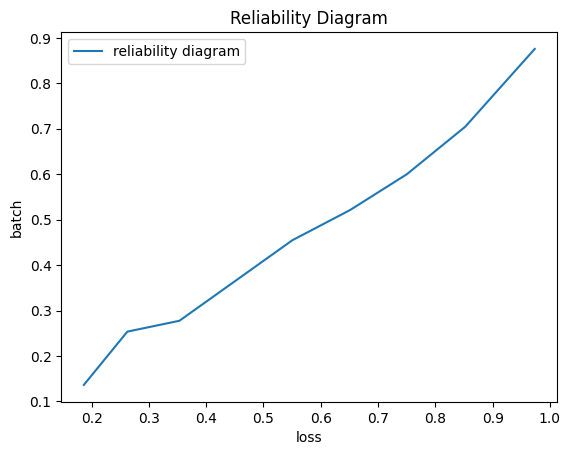

In [52]:
fig, ax = plt.subplots()

plt.plot(bin_confs, bin_accs, label='reliability diagram')
plt.legend()

ax.set_ylabel('batch')
ax.set_xlabel('loss')
ax.set_title(f'Reliability Diagram')

plt.show()